# 1. Preparación entorno

## 1.1 Configuración Google Colab
Instalamos fast.ai 0.7.0 y las librerias requeridas para ejecutar el notebook.

In [0]:
# Comprobamos la versión de la libreria Fastai instalada (queremos utilizar la versión 0.7.0)
!pip freeze | grep fastai

# Libreria Fastai necesaria
print ("Instalando libreria FastAI... (tardará unos 2 minutos)")
!pip install fastai==0.7.0 > /dev/null

print ("\nInstalando librerias requeridas...")
!pip install torchtext==0.2.3 > /dev/null
!git clone https://github.com/fastai/fastai.git fastai_ml
!ln -s fastai_ml/courses/ml1/fastai/ fastai

# Autorecarga todos los módulos cada vez antes de ser ejecutados
%load_ext autoreload
%autoreload 2

# Permite mostrar los gráficos calculados en linea
%matplotlib inline

fastai==0.7.0
Instalando libreria FastAI... (tardará unos 2 minutos)

Instalando librerias requeridas...
fatal: destination path 'fastai_ml' already exists and is not an empty directory.


## 1.2. Importar librerias

In [0]:
# Importamos las librerias necesarias para trabajar

from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

# 2. Carga de datos

##2.1 Descarga los datos de tiempo, calidad del aire y tráfico

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# Creamos un cliente PyDrive para autenticarnos con Google
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#enlace = 'https://drive.google.com/open?id=1_nK1kW4WrIHvdVwwnRLLSxslLnTBxQf4' #RabassaBabelPla.csv
enlace = "https://drive.google.com/open?id=13nzUvGz77YnIOEkVbZYbmOsPP440k5Hk" #Babel.csv
#enlace = 'https://drive.google.com/open?id=1Dqd9uPWq9IxVfm-JS19J2ydUqgQd3MqN' #Rabassa.csv
fluff, id = enlace.split('=')
print (id) # Verify that you have everything after '='

13nzUvGz77YnIOEkVbZYbmOsPP440k5Hk


In [0]:
!rm Babel.csv
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Babel.csv')

rm: cannot remove 'Babel.csv': No such file or directory


In [0]:
# Comprobamos que el fichero Rabassa.csv se ha descargado
!ls

adc.json  Babel.csv  fastai  fastai_ml	RabassaBabelPla.csv  sample_data


In [0]:
# Comprobamos que el fichero se lee correctamente
!head 'Babel.csv'

ESTACION;FECHA;HORA;SO2;CO;NO;NO2;PM10;NOx;O3;PM25;PM1;Veloc;Direc;Temp;HRel;Pres;Rsol;Precip;Intensidad;Fiabilidad;Ocupacion;FiabOcupa;Velocidad;FiabVelocidad;Cola
Alacant_Florida_Babel;01/01/2017;0;3;;4;17;;23;33;;;2,1;296;12,1;83;#N/A;0;0;79,5;99,27044025;0,5;100;10,5;24,9047619;0
Alacant_Florida_Babel;01/01/2017;1;3;;4;23;;29;30;;;2;302;12,5;81;#N/A;0;0;92,25;100;0,5;100;11,75;25;0
Alacant_Florida_Babel;01/01/2017;2;3;;4;21;;27;27;;;1,6;294;12,3;81;#N/A;0;0;77,75;100;0;100;9,5;25;0
Alacant_Florida_Babel;01/01/2017;3;3;;4;19;;25;24;;;2,4;290;11,8;83;#N/A;0;0;67;100;0,25;100;8,5;25;0
Alacant_Florida_Babel;01/01/2017;4;3;;4;16;;22;26;;;1,9;293;11,6;83;#N/A;0;0;55;99,50909091;0;99,25;6;24,875;0
Alacant_Florida_Babel;01/01/2017;5;3;;4;13;;19;29;;;1,9;297;11,7;84;#N/A;1;0;42;100;0;100;2,75;25;0
Alacant_Florida_Babel;01/01/2017;6;3;;4;13;;19;27;;;1;296;11,8;83;#N/A;1;0;36,5;100;0;100;3,5;25;0
Alacant_Florida_Babel;01/01/2017;7;3;;4;16;;22;26;;;0,6;281;11,8;84;#N/A;0;0;48,25;96,26943005;3,

##2.2 Lectura de los datos

In [0]:
# Leemos los datos del CSV y los cargamos en un dataframe

df_raw = pd.read_csv(f'Babel.csv', delimiter=";", low_memory=False, parse_dates=["FECHA"], encoding = "ISO-8859-1", decimal=",")

df_raw = df_raw.drop(columns='CO')
df_raw = df_raw.drop(columns='PM10')
df_raw = df_raw.drop(columns='PM1')
df_raw = df_raw.drop(columns='PM25')


#3. Análisis de la información

##3.1 Análisis inicial básico

In [0]:
# Contamos el número de registros
print("Nuúmero de registros")
display(len(df_raw))
display(df_raw.head())
display(df_raw.describe(include='all').T)
display(df_raw.dtypes)

Nuúmero de registros


17484

,ESTACION,FECHA,HORA,SO2,NO,NO2,NOx,O3,Veloc,Direc,Temp,HRel,Pres,Rsol,Precip,Intensidad,Fiabilidad,Ocupacion,FiabOcupa,Velocidad,FiabVelocidad,Cola
0,Alacant_Florida_Babel,2017-01-01,0,3,4,17,23,33,2.1,296.0,12.1,83.0,NaN,0.0,0.0,79.50,99.270440,0.50,100.00,10.50,24.904762,0.0
1,Alacant_Florida_Babel,2017-01-01,1,3,4,23,29,30,2.0,302.0,12.5,81.0,NaN,0.0,0.0,92.25,100.000000,0.50,100.00,11.75,25.000000,0.0
2,Alacant_Florida_Babel,2017-01-01,2,3,4,21,27,27,1.6,294.0,12.3,81.0,NaN,0.0,0.0,77.75,100.000000,0.00,100.00,9.50,25.000000,0.0
3,Alacant_Florida_Babel,2017-01-01,3,3,4,19,25,24,2.4,290.0,11.8,83.0,NaN,0.0,0.0,67.00,100.000000,0.25,100.00,8.50,25.000000,0.0
4,Alacant_Florida_Babel,2017-01-01,4,3,4,16,22,26,1.9,293.0,11.6,83.0,NaN,0.0,0.0,55.00,99.509091,0.00,99.25,6.00,24.875000,0.0


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
ESTACION,17484,1,Alacant_Florida_Babel,17484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FECHA,17484,730,2018-10-26 00:00:00,24,2017-01-01 00:00:00,2018-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HORA,17484,NaN,NaN,NaN,NaN,NaN,11.4999,6.92494,0,5,12,18,23
SO2,17484,NaN,NaN,NaN,NaN,NaN,3.42891,0.892001,0,3,3,4,13
NO,17484,NaN,NaN,NaN,NaN,NaN,7.40237,17.6541,0,2,2,4,279
NO2,17484,NaN,NaN,NaN,NaN,NaN,22.8926,20.9706,0,8,16,31,150
NOx,17484,NaN,NaN,NaN,NaN,NaN,34.0698,44.1175,0,11,20,37,543
O3,17484,NaN,NaN,NaN,NaN,NaN,56.9825,30.0799,0,34,61,81,154
Veloc,17399,NaN,NaN,NaN,NaN,NaN,2.14776,1.92319,0,0.7,1.6,3.2,16.4
Direc,17461,NaN,NaN,NaN,NaN,NaN,196.874,93.6468,0,104,214,285,360


ESTACION                 object
FECHA            datetime64[ns]
HORA                      int64
SO2                       int64
NO                        int64
NO2                       int64
NOx                       int64
O3                        int64
Veloc                   float64
Direc                   float64
Temp                    float64
HRel                    float64
Pres                    float64
Rsol                    float64
Precip                  float64
Intensidad              float64
Fiabilidad              float64
Ocupacion               float64
FiabOcupa               float64
Velocidad               float64
FiabVelocidad           float64
Cola                    float64
dtype: object

In [0]:
# Eliminamos filas con algun registro a nulo
df_raw = df_raw.dropna().copy()


# Mostramos los datos estadisticos de cada una de las variables, teniendo en cuenta toda la información, aunque no cambia en este caso..
df_raw.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
ESTACION,15253,1,Alacant_Florida_Babel,15253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FECHA,15253,657,2017-03-30 00:00:00,24,2017-01-04 00:00:00,2018-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HORA,15253,NaN,NaN,NaN,NaN,NaN,11.5563,6.90349,0,6,12,18,23
SO2,15253,NaN,NaN,NaN,NaN,NaN,3.44116,0.901613,0,3,3,4,13
NO,15253,NaN,NaN,NaN,NaN,NaN,7.16757,17.5577,0,2,2,4,279
NO2,15253,NaN,NaN,NaN,NaN,NaN,22.9587,21.0846,0,8,16,31,150
NOx,15253,NaN,NaN,NaN,NaN,NaN,33.7844,44.0699,0,11,19,36,543
O3,15253,NaN,NaN,NaN,NaN,NaN,57.7559,30.3003,0,34,62,82,154
Veloc,15253,NaN,NaN,NaN,NaN,NaN,2.05099,1.80739,0,0.6,1.5,3.1,12.2
Direc,15253,NaN,NaN,NaN,NaN,NaN,194.004,93.5525,0,104,198,284,360


In [0]:

add_datepart(df_raw, 'FECHA')

# Convirtiendo los tipos de 64 a 32 bits
pairs = {'int64':'int32', 'float64':'float32'}
for i in df_raw.columns:
  df_raw[i]= df_raw[i].astype(pairs.get(str(df_raw[i].dtype), df_raw[i].dtype))

df_raw.ESTACION = df_raw.ESTACION.replace({"Alacant_El Pla": 1, "Alacant_Florida_Babel": 2,"Alacant_Rabassa": 3})
df_raw['ESTACION'] = df_raw['ESTACION'].astype('category')
df_raw['Cola'] = df_raw['Cola'].astype('category')
df_raw['FECHAYear'] = df_raw['FECHAYear'].astype('category')
train_cats(df_raw)
display(df_raw['ESTACION'].dtype)
display(df_raw['Cola'].dtype)
display(df_raw['FECHAYear'].dtype)

display(df_raw.dtypes)

CategoricalDtype(categories=[2], ordered=True)

CategoricalDtype(categories=[0.0], ordered=True)

CategoricalDtype(categories=[2017, 2018], ordered=True)

ESTACION                 category
HORA                        int32
SO2                         int32
NO                          int32
NO2                         int32
NOx                         int32
O3                          int32
Veloc                     float32
Direc                     float32
Temp                      float32
HRel                      float32
Pres                      float32
Rsol                      float32
Precip                    float32
Intensidad                float32
Fiabilidad                float32
Ocupacion                 float32
FiabOcupa                 float32
Velocidad                 float32
FiabVelocidad             float32
Cola                     category
FECHAYear                category
FECHAMonth                  int32
FECHAWeek                   int32
FECHADay                    int32
FECHADayofweek              int32
FECHADayofyear              int32
FECHAIs_month_end            bool
FECHAIs_month_start          bool
FECHAIs_quarte

In [0]:
# Descartamos las variables de calidad de Aire, salvo la que queremos predecir

#df = df_raw[['NO2','Rsol','HORA','Direc','Velocidad','Temp','Intensidad','HRel','Veloc','Fiabilidad','FECHADayofyear','Pres','Ocupacion','FECHADayofweek','FECHAWeek','FiabOcupa','FiabVelocidad','FECHADay','FECHAMonth','Precip']]
df = df_raw[['NO2','Rsol','HORA','Direc','Velocidad','Temp','HRel','Intensidad','Veloc','Fiabilidad','FECHADayofyear','Pres','Ocupacion','FECHADayofweek','FECHAWeek','FECHAYear','FiabOcupa','FiabVelocidad','FECHADay','FECHAMonth','FECHAIs_month_end','Precip','FECHAIs_month_start','FECHAIs_quarter_end','FECHAIs_year_end','Cola','FECHAIs_quarter_start','FECHAIs_year_start','ESTACION']]


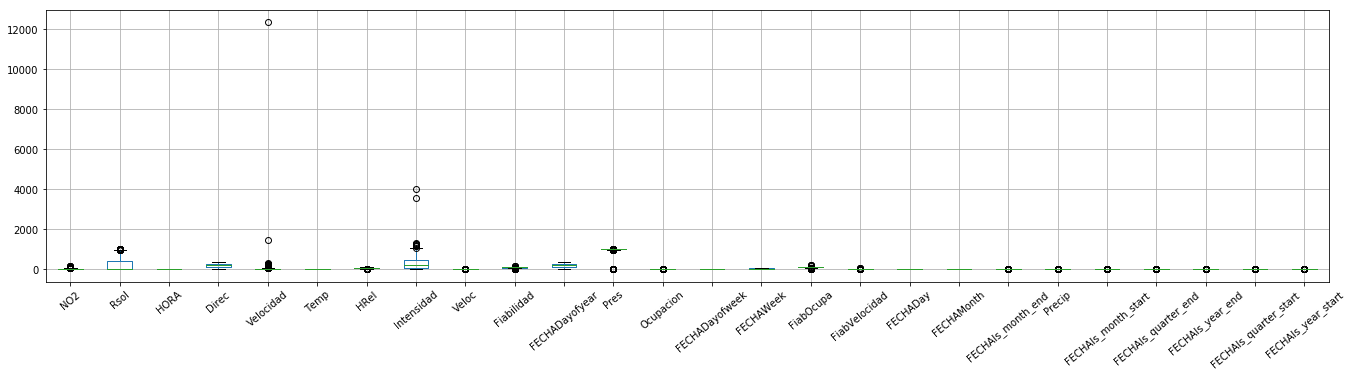

In [0]:
# Diagrama de cajas general
df.boxplot(figsize=(23,5), rot=40)

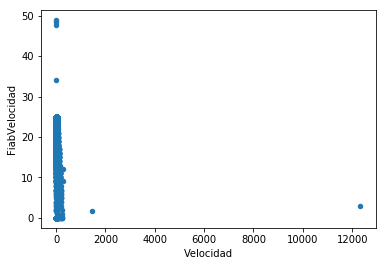

In [0]:
# Análisis de la velocidad
my_plot = df.plot("Velocidad", "FiabVelocidad", kind="scatter")

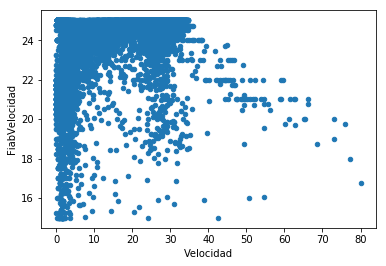

In [0]:
# Tal y como se ve en el gráfico anterior, existen algunos datos que deben ser erroneos, velocidades muy altas.
# Dado que estamos en ciudad, eliminamos las velocidades superiores a 80km/h
# Eliminamos tambien todos los registros cuya fiabilidad es mayor de 25 y menor de 15

df = df.drop(df[df['Velocidad']>80].index)
df = df.drop(df[df['FiabVelocidad']>25].index)
df = df.drop(df[df['FiabVelocidad']<15].index)

# Generamos el gráfico de nuevo
my_plot = df.plot("Velocidad", "FiabVelocidad", kind="scatter")

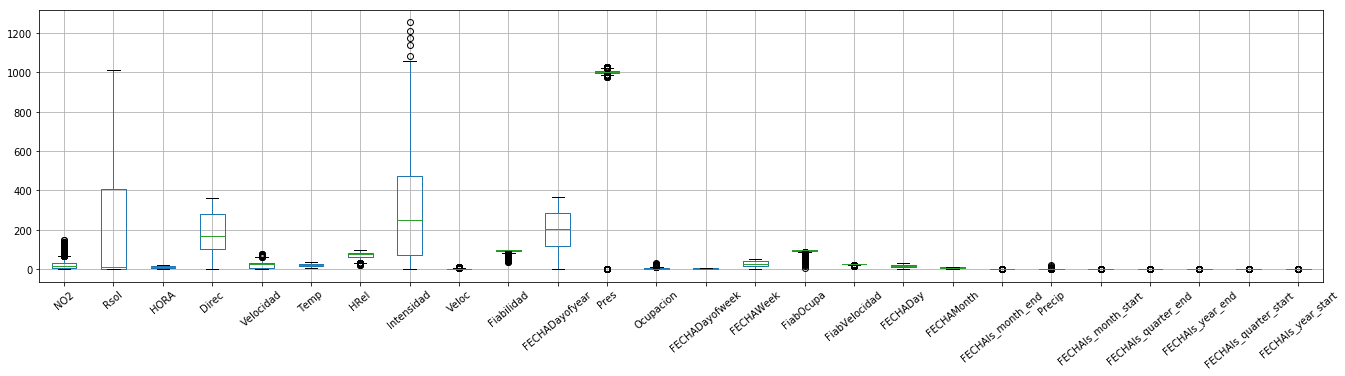

In [0]:
# Diagrama de cajas general
df.boxplot(figsize=(23,5), rot=40)

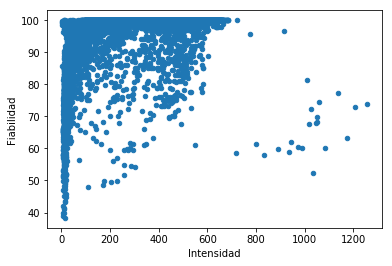

In [0]:
# Análisis de la Intensidad
my_plot = df.plot("Intensidad", "Fiabilidad", kind="scatter")

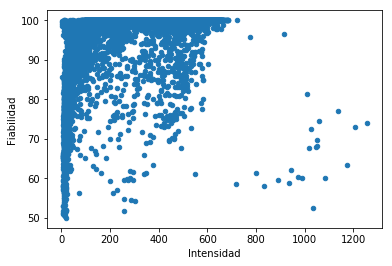

In [0]:
# Eliminamos tambien todos los registros cuya fiabilidad es mayor de 100 y menor de 50

df = df.drop(df[df['Fiabilidad']>100].index)
df = df.drop(df[df['Fiabilidad']<50].index)

# Generamos el gráfico de nuevo
my_plot = df.plot("Intensidad", "Fiabilidad", kind="scatter")

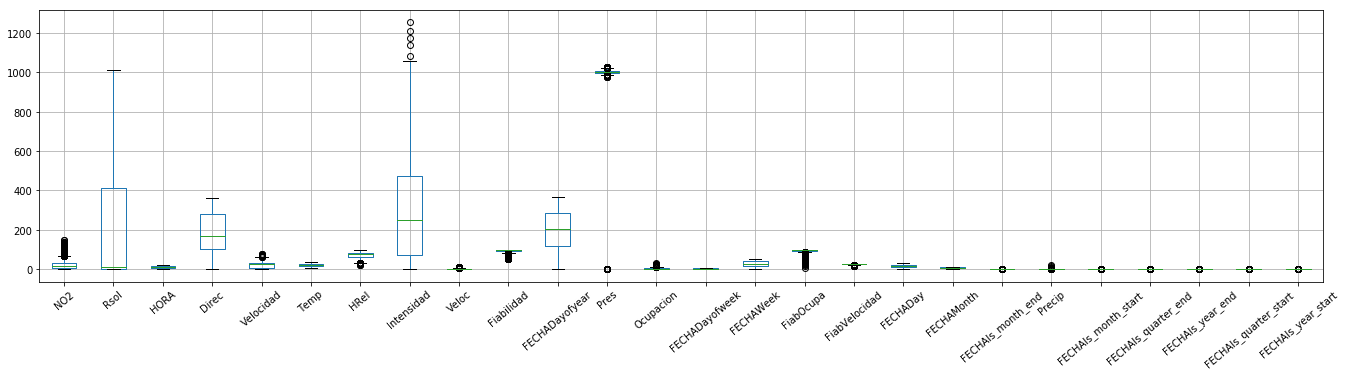

In [0]:
# Diagrama de cajas general
df.boxplot(figsize=(23,5), rot=40)

In [0]:
# Los valores de la Rsol tienen mucha diferencia, le aplicamos el algoritmo para que la diferencia no sea tan grande
# Aplicamos el logaritmo a la columna Rsol, convirtiendo primero los negativos a 0 e indicamos que no trabajamos con el resto
# Aplicamos el logaritmo a la columna Intensidad, convirtiendo primero los negativos a 0 e indicamos que no trabajamos con el resto
# Aplicamos el logaritmo a la columna Pres, convirtiendo primero los negativos a 0 e indicamos que no trabajamos con el resto

df.Rsol = np.log1p(np.clip(df.Rsol, 0, None))
df.Intensidad = np.log1p(np.clip(df.Intensidad, 0, None))
df.Pres = np.log1p(np.clip(df.Pres, 0, None))

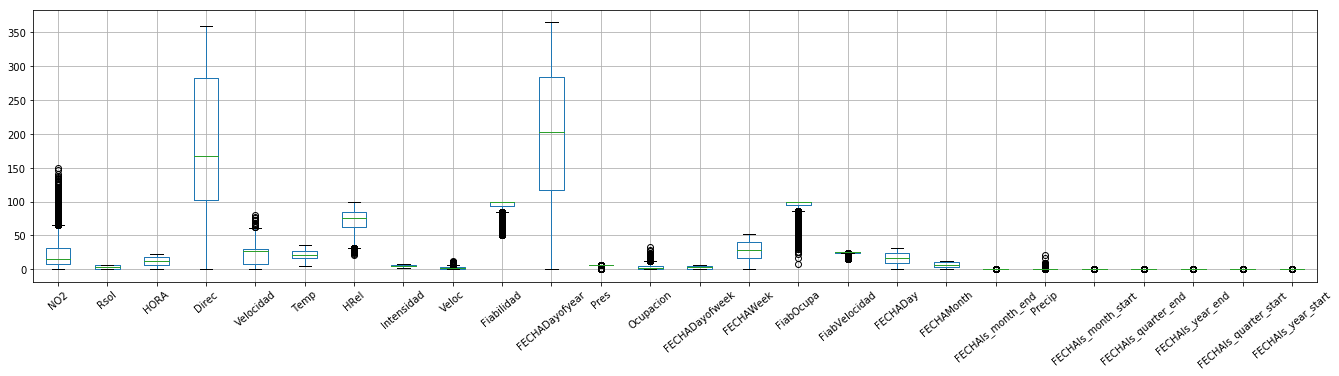

In [0]:
# Diagrama de cajas general
df.boxplot(figsize=(23,5), rot=40)

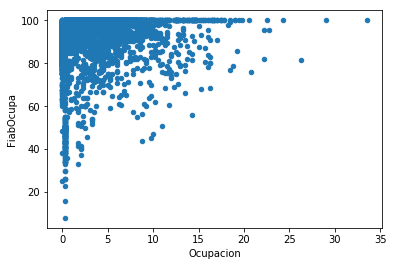

In [0]:
# Análisis de la Ocupación
my_plot = df.plot("Ocupacion", "FiabOcupa", kind="scatter")

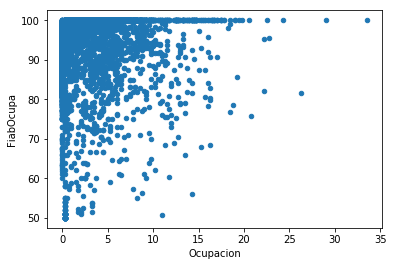

In [0]:
# Eliminamos tambien todos los registros cuya fiabilidad es mayor de 100 y menor de 50

df = df.drop(df[df['FiabOcupa']>100].index)
df = df.drop(df[df['FiabOcupa']<50].index)

# Generamos el gráfico de nuevo
my_plot = df.plot("Ocupacion", "FiabOcupa", kind="scatter")

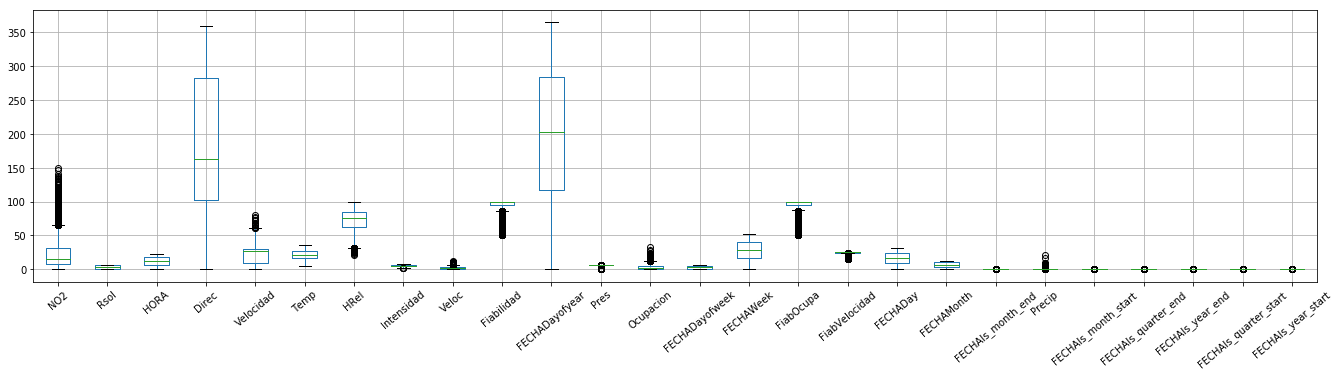

In [0]:
# Diagrama de cajas general
df.boxplot(figsize=(23,5), rot=40)

#4. Preparación de los datos

In [0]:
# Mostramos los datos estadisticos de cada una de las variables, teniendo en cuenta toda la información, aunque no cambia en este caso..
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
NO2,13126,NaN,NaN,NaN,22.6839,21.0519,0,8,15,31,150
Rsol,13126,NaN,NaN,NaN,2.99774,2.82913,0,0,2.77259,6.03008,6.92264
HORA,13126,NaN,NaN,NaN,11.8213,6.89176,0,6,12,18,23
Direc,13126,NaN,NaN,NaN,189.656,93.5808,0,103,163,283,360
Velocidad,13126,NaN,NaN,NaN,20.5737,11.636,0,9.25,26.5,29.75,80
Temp,13126,NaN,NaN,NaN,21.4276,5.82614,4.2,17,21.8,26.3,36.5
HRel,13126,NaN,NaN,NaN,72.6877,14.745,21,63,75,84,100
Intensidad,13126,NaN,NaN,NaN,5.15684,1.16163,1.55814,4.36628,5.53832,6.16279,7.13549
Veloc,13126,NaN,NaN,NaN,2.02292,1.75665,0,0.6,1.5,3.1,12.1
Fiabilidad,13126,NaN,NaN,NaN,95.4083,8.39027,50,94.299,100,100,100


In [0]:
X, y, nas = proc_df(df, 'NO2')

In [0]:
# Separamos el conjunto de datos en 2 para utilizar unos cuantos para entrenamiento y otro conjunto para validar (20%)

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [0]:
# definimos una función que nos dice el error medio cuadrático del modelo
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

# Nos saca el RSME del modelo de entrenamiento, de los datos de validación y los errores descriptivos
def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [0]:
m = RandomForestRegressor(n_estimators=100,  min_samples_leaf=3, max_features='sqrt', n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

# [training rmse, validation rmse, r^2 for training set, r^2 for validation set]

CPU times: user 2.72 s, sys: 20.8 ms, total: 2.74 s
Wall time: 1.5 s
[6.421441761048096, 10.13605672226579, 0.906483962124785, 0.7726764544502919, 0.7565835951397047]


In [0]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(m.estimators_[0], out_file='tree.dot', 
                feature_names = X_train.columns,
                class_names = True,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=2400'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

Output hidden; open in https://colab.research.google.com to view.

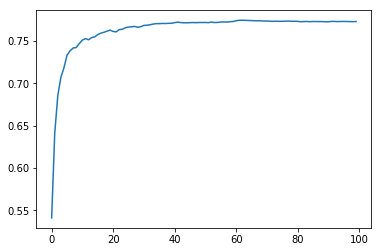

In [0]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(100)]);

In [0]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features='sqrt', n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

# [training rmse, validation rmse, r^2 for training set, r^2 for validation set]
# [4.330069918071425, 11.469991240176894, 0.9521774579801718, 0.6603429116622389]

CPU times: user 807 ms, sys: 16 ms, total: 823 ms
Wall time: 493 ms
[6.564620486405727, 10.39852000973726, 0.9022672206643013, 0.7607513916095814, 0.7406167340646106]


In [0]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

In [0]:
fi = rf_feat_importance(m, X_train); fi[:50]

,cols,imp
7,Veloc,0.186490
2,Direc,0.149132
4,Temp,0.082915
6,Intensidad,0.076061
0,Rsol,0.064751
1,HORA,0.063370
3,Velocidad,0.056012
5,HRel,0.048246
11,Ocupacion,0.046791
10,Pres,0.041261


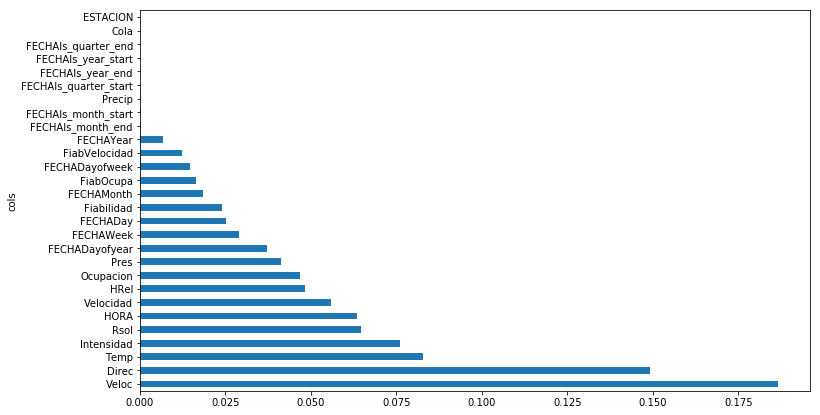

In [0]:
plot_fi(fi[:50]);

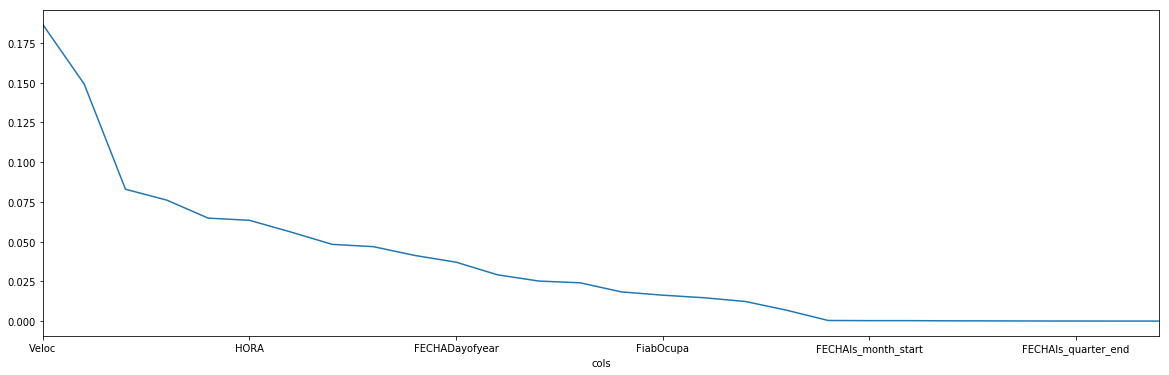

In [0]:
fi.plot('cols', 'imp', figsize=(20,6), legend=False);

In [0]:
to_keep = fi[fi.imp>0.05].cols
len(to_keep)

7

In [0]:
df_keep = X[to_keep].copy()
X_train, X_valid, y_train, y_valid = train_test_split(df_keep, y, test_size=0.2)

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features='sqrt', n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

# [training rmse, validation rmse, r^2 for training set, r^2 for validation set]

CPU times: user 774 ms, sys: 6.7 ms, total: 781 ms
Wall time: 472 ms
[7.37705539921902, 10.467425591487086, 0.8784027671936732, 0.7423987682770482, 0.7119624707702852]


In [0]:
fi = rf_feat_importance(m, X_train); fi[:50]

,cols,imp
0,Veloc,0.274903
1,Direc,0.185751
3,Intensidad,0.144926
2,Temp,0.142631
5,HORA,0.090652
6,Velocidad,0.088548
4,Rsol,0.072589


In [0]:
# Export as dot file
export_graphviz(m.estimators_[0], out_file='tree.dot', 
                feature_names = X_train.columns,
                class_names = True,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

Output hidden; open in https://colab.research.google.com to view.

In [0]:
# Export as dot file
export_graphviz(m.estimators_[0], out_file='tree.dot', 
                feature_names = X_train.columns,
                class_names = True,
                rounded = True, proportion = False, 
                precision = 2, filled = True, max_depth=4)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

Output hidden; open in https://colab.research.google.com to view.

In [0]:
def get_preds(t): return t.predict(X_valid)
%time preds = np.stack(parallel_trees(m, get_preds))
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 39 ms, sys: 62 ms, total: 101 ms
Wall time: 159 ms


(11.3080328005328, 6.047727131949549)

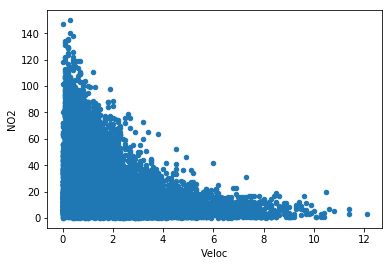

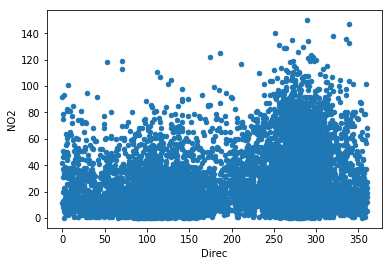

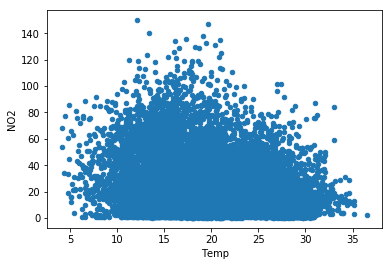

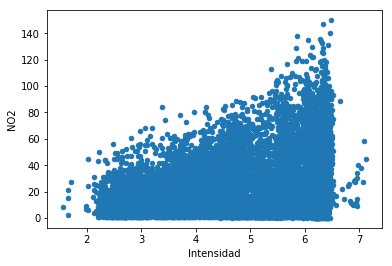

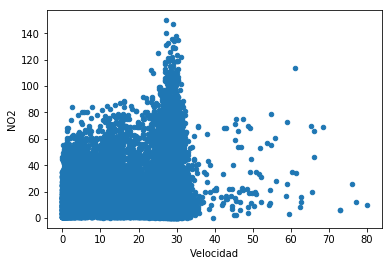

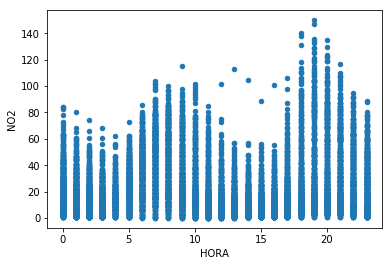

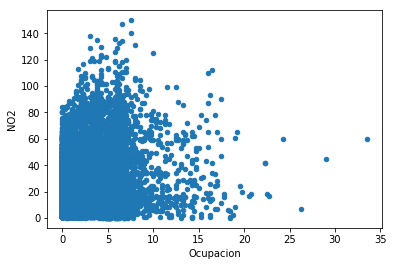

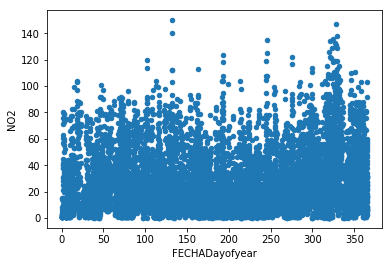

In [0]:
df.plot('Veloc', 'NO2', kind="scatter")
df.plot('Direc', 'NO2', kind="scatter")
df.plot('Temp', 'NO2', kind="scatter")
df.plot('Intensidad', 'NO2', kind="scatter")
df.plot('Velocidad', 'NO2', kind="scatter")
df.plot('HORA', 'NO2', kind="scatter")
df.plot('Ocupacion', 'NO2', kind="scatter")
df.plot('FECHADayofyear','NO2',kind='scatter')

In [0]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

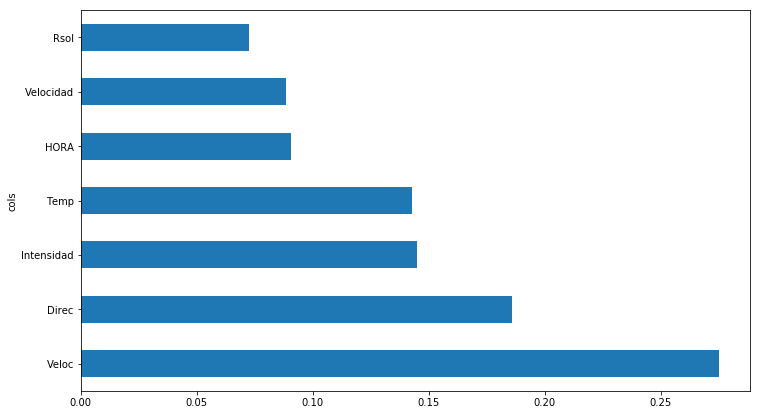

In [0]:
plot_fi(fi[:50]);